In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [2]:
bp_file = '/mnt/volume1/T2D/EMR-data/Vitals.csv'
bp_file_p = '/mnt/volume1/T2D/EMR-data2/Vitals.csv'

In [3]:
data_pd = pd.read_csv(bp_file, sep='|')


In [4]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(149216, 6157)

In [5]:
data_pd.head()

,Deidentified_Pat_ID,Weight,WeightYear,Height,HeightYear,BMI,BMIYear
0,MNGVDHTH,2700.8,2019.0,28.54,2019.0,64.50,2019.0
1,MNGVDHTH,2688.0,2019.0,NaN,NaN,NaN,NaN
2,MNOZVONA,3609.6,2018.0,NaN,NaN,NaN,NaN
3,MNOZVONA,3798.4,2018.0,31.98,2018.0,72.25,2018.0
4,MNOGADHT,3532.8,2019.0,NaN,NaN,NaN,NaN


In [6]:
data_pd.sort_values(['Deidentified_Pat_ID', 'WeightYear'], inplace=True)

In [7]:
data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last', inplace=True)
data_pd.reset_index(drop=True,inplace=True)

In [8]:
len(data_pd), len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

(6157, 6157)

In [11]:
data_pd.to_csv(bp_file_p, index=False)

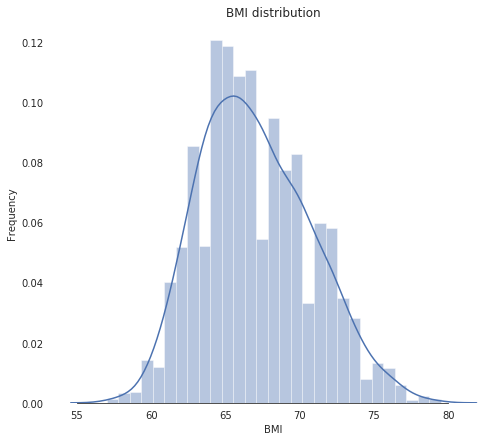

In [12]:
data_pd = data_pd[data_pd['BMI'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_pd['BMI'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="BMI")
ax.set(title="BMI distribution")
sns.despine(trim=True, left=True)
plt.show()